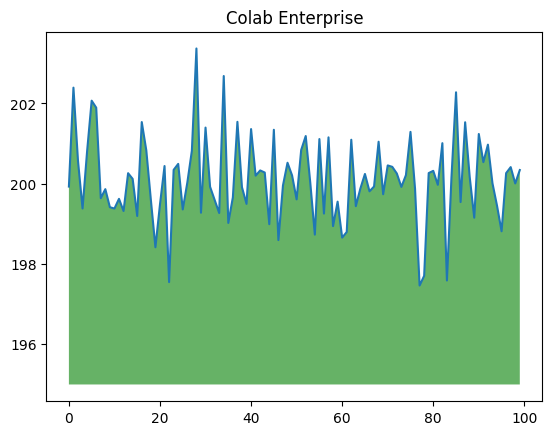

In [ ]:
    import numpy as np
    from matplotlib import pyplot as plt

    ys = 200 + np.random.randn(100)
    x = [x for x in range(len(ys))]

    plt.plot(x, ys, '-')
    plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

    plt.title("Colab Enterprise")
    plt.show()

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
bq = bigquery.Client()

In [4]:
client = bigquery.Client()

query = """SELECT * FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017` LIMIT 1000"""
job = client.query(query)
df = job.to_dataframe()

In [5]:
%%bigquery df
SELECT *
FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`

Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
df.head()

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom
0,2017-11-06,15:16:01,41.39092,2.15110,7,orange,PARLEM,2,STATE_EMERGENCY_ONLY,4G,10.1,3.0,20.0,gps,ON_FOOT,NaN,NaN,080193,Barcelona,POINT(2.1511 41.39092)
1,2016-12-18,22:21:05,41.62073,2.67575,14,Orange F,Orange F,0,STATE_IN_SERVICE,2G,0.1,3.0,15.0,gps,STILL,NaN,NaN,081635,Pineda de Mar,POINT(2.67575 41.62073)
2,2016-02-29,09:57:23,41.63613,2.36114,18,TICAE,TICAE,2,STATE_EMERGENCY_ONLY,3G,1.1,5.0,18.0,gps,TILTING,NaN,NaN,080462,Cardedeu,POINT(2.36114 41.63613)
3,2015-03-21,17:24:40,42.53326,1.58505,14,MOBILAND,MOBILAND,0,STATE_IN_SERVICE,2G,16.3,5.0,18.0,gps,IN_VEHICLE,NaN,NaN,None,None,POINT(1.58505 42.53326)
4,2017-06-09,09:00:37,41.37140,1.29286,14,Eroski Movil,Eroski Movil,2,STATE_EMERGENCY_ONLY,3G,75.8,4.0,17.0,gps,IN_VEHICLE,NaN,NaN,431080,el Pla de Santa Maria,POINT(1.29286 41.3714)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11744914 entries, 0 to 11744913
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           dbdate 
 1   hour           dbtime 
 2   lat            float64
 3   long           float64
 4   signal         Int64  
 5   network        object 
 6   operator       object 
 7   status         Int64  
 8   description    object 
 9   net            object 
 10  speed          float64
 11  satellites     float64
 12  precission     float64
 13  provider       object 
 14  activity       object 
 15  downloadSpeed  float64
 16  uploadSpeed    float64
 17  postal_code    object 
 18  town_name      object 
 19  position_geom  object 
dtypes: Int64(2), dbdate(1), dbtime(1), float64(7), object(9)
memory usage: 1.8+ GB


In [8]:
df.describe()

,lat,long,signal,status,speed,satellites,precission,downloadSpeed,uploadSpeed
count,1.174491e+07,1.174491e+07,11744914.0,11744914.0,1.174491e+07,1.174369e+07,1.174369e+07,0.0,0.0
mean,4.120760e+01,7.851310e-01,13.262954,1.778794,2.643376e+01,9.795352e+05,4.636630e+07,NaN,NaN
std,3.481886e+00,9.397493e+00,7.467304,0.633283,3.553885e+01,3.356759e+09,9.644288e+10,NaN,NaN
min,-7.703775e+01,-1.787292e+02,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,4.138028e+01,1.690790e+00,8.0,2.0,1.400000e+00,2.000000e+00,1.000000e+01,NaN,NaN
50%,4.148911e+01,2.123840e+00,13.0,2.0,7.400000e+00,5.000000e+00,1.700000e+01,NaN,NaN
75%,4.169777e+01,2.245140e+00,18.0,2.0,4.080000e+01,7.000000e+00,3.000000e+01,NaN,NaN
max,6.343513e+01,1.396410e+02,99.0,3.0,2.550000e+02,1.150330e+13,2.415039e+14,NaN,NaN


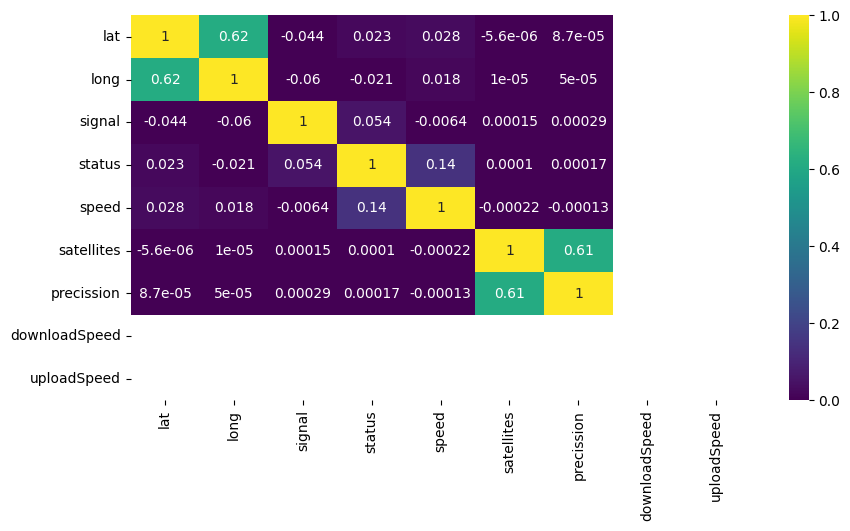

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, cmap='viridis')
plt.show()

In [10]:
%%bigquery df2
SELECT signal, status
FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`

Query is running:   0%|          |

Downloading:   0%|          |

In [11]:
df2.head()

,signal,status
0,99,0
1,53,2
2,52,0
3,33,0
4,60,0
